Sports Car Prices dataset


Этот набор данных содержит информацию о ценах на различные спортивные автомобили различных производителей. В датасете указаны марка и модель автомобиля, год производства, объем двигателя, мощность, крутящий момент, время разгона до 60 миль в час и цена в долларах США. Датасет полезен для анализа цен на различные спортивные автомобили и выявления тенденций на рынке.

Данные:

1. Марка автомобиля: Производитель автомобиля, представляющий бренд или компанию, которая выпустила автомобиль. Примеры марок в этом наборе данных включают Porsche, Lamborghini, Ferrari, Audi и McLaren.
2. Модель автомобиля: Модель спортивного автомобиля, представляющая конкретную версию или вариант автомобиля, выпущенный производителем. Примеры моделей автомобилей в этом наборе данных включают 911, Huracan, 488 GTB, R8, 720S, M8, AMG GT, Corvette, Mustang Shelby GT500 и GT-R Nismo.
3. Год: Год производства спортивного автомобиля, который указывает на модельный год, когда автомобиль был впервые представлен или доступен для покупки.
4. Объем двигателя (л): Объем двигателя спортивного автомобиля в литрах, который представляет собой объем цилиндров двигателя. Больший объем двигателя обычно указывает на более высокую мощность и производительность. Объемы двигателей в этом наборе данных варьируются от 2.0 до 8.0 литров, а у некоторых автомобилей используются электрические двигатели.
5. Лошадиные силы: Лошадиные силы спортивного автомобиля, которые представляют собой мощность двигателя автомобиля. Больший показатель лошадиных сил обычно указывает на более быстрое ускорение и более высокую максимальную скорость. Значения лошадиных сил в этом наборе данных варьируются от 300 до 1479.
6. Крутящий момент (фунт-фут): Крутящий момент спортивного автомобиля в фунт-футах, который представляет силу вращения, создаваемую двигателем. Большие значения крутящего момента обычно указывают на более сильное ускорение и лучшее управление автомобилем. Значения крутящего момента в этом наборе данных варьируются от 270 до 1180.
7. Время разгона до 60 миль в час (секунды): Время, за которое спортивный автомобиль разгоняется от 0 до 60 миль в час, что является общей мерой ускорения и производительности. Меньшие значения времени разгона обычно указывают на более быстрое ускорение и лучшую производительность. Время разгона до 60 миль в час в этом наборе данных варьируется от 1.85 до 5.3 секунд.
8. Цена (в USD): Цена спортивного автомобиля в долларах США, представляющая стоимость покупки автомобиля. Цены в этом наборе данных варьируются от 25 000 до 3 000 000 долларов США.



In [2]:
# Добавим необходимые библиотеки и укажем файл
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.graph_objs as go
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
file = './Sport car price.csv'

In [3]:
# Распарсим наш дата сет
data = pd.read_csv(file)


In [4]:
#выведем данные 
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [5]:
data.info() # выведем информацию о данных и их типах


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [6]:
# Для удобства работы с данными изменим названия столбцов
new_column_names = {
    'Car Make': 'car',
    'Car Model': 'model',
    'Year': 'year',
    'Engine Size (L)': 'engine_size',
    'Horsepower': 'power',
    'Torque (lb-ft)': 'torque',
    '0-60 MPH Time (seconds)': 'acceleration_seconds',
    'Price (in USD)': 'price_usd'
}
data = data.rename(columns=new_column_names)
data.head() # посмотрим новую таблицу данных


,car,model,year,engine_size,power,torque,acceleration_seconds,price_usd
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


Исправим некорректные строки

In [7]:
data['price_usd'] = data['price_usd'].str.replace(',', '').astype(int) #преобразуем деньги в числовой формат

In [8]:
data['acceleration_seconds'] = pd.to_numeric(data['acceleration_seconds'], errors='coerce') # изменим тип переменной на float, в случае ошибки укажем NaN
data['acceleration_seconds'] = data['acceleration_seconds'].fillna(1.88) #заменим значечиние nan на 1.88

In [9]:
data['engine_size'] = pd.to_numeric(data['engine_size'], errors='coerce') # изменим тип переменной на float, в случае ошибки укажем NaN
# data['engine_size'] = data['engine_size'].fillna(-1) #заменим значечиние nan на -1


In [10]:
aberrant_values = ['10,000', '1,500', '1,000+']
for val in aberrant_values:
    data = data[data['power'] != val]
data['power'] = data['power'].replace({'1000+': 1001, '1,020': 1020})
data['power'] = pd.to_numeric(data['power'], errors='coerce') # изменим тип переменной на float, в случае ошибки укажем NaN
data['power'] = data['power'].fillna(1000)#заменим значечиние nan на 1000

In [11]:
data = data[(data['torque'] != '10,000+') & (data['torque'] != '-')]
data['torque'] = data['torque'].replace({'1,050': 1050}) # исправим данные о крутящем моменте

In [12]:
rows_with_nan = data[data.isnull().any(axis=1)]

# Выведем строки с пропущенными значениями
print(rows_with_nan)

              car                      model  year  engine_size   power  \
26          Rimac                     Nevera  2022          NaN  1914.0   
37        Porsche                  Taycan 4S  2022          NaN   562.0   
42            BMW                         i8  2020          NaN   369.0   
97          Rimac                     Nevera  2022          NaN  1914.0   
99          Tesla                   Roadster  2022          NaN  1001.0   
168         Rimac                      C_Two  2022          NaN  1914.0   
171         Tesla              Model S Plaid  2021          NaN  1020.0   
185       Porsche                     Taycan  2021          NaN   750.0   
222       Porsche             Taycan Turbo S  2021          NaN   750.0   
247         Tesla              Model S Plaid  2022          NaN  1020.0   
278         Rimac                      C_Two  2022          NaN  1914.0   
280   Pininfarina                   Battista  2022          NaN  1874.0   
299       Porsche        

In [13]:
# удалим из датасета строки с электрокарами, так как они не содержат информации о двигателе и крутящем моменте в силу особенности строения автомобиля
data = data.dropna()
data.head()


,car,model,year,engine_size,power,torque,acceleration_seconds,price_usd
0,Porsche,911,2022,3.0,379.0,331,4.0,101200
1,Lamborghini,Huracan,2021,5.2,630.0,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661.0,561,3.0,333750
3,Audi,R8,2022,5.2,562.0,406,3.2,142700
4,McLaren,720S,2021,4.0,710.0,568,2.7,298000


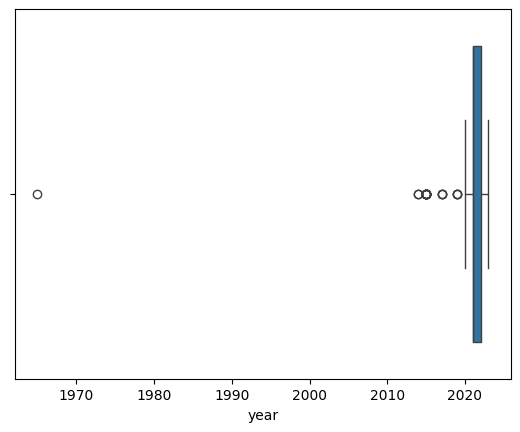

In [14]:

sns.boxplot(x=data.year)# найдено аномальное значение в году
data = data.query('year > 1970') # уберем его

Анализ данных

Анализ по маркам автомобилей

In [15]:
car_counts = data.groupby('car').size().reset_index(name='counts')
fig = px.bar(car_counts, x='car', y='counts', title='Количество моделей производимых марками', 
             labels={'car': 'Автомобиль', 'counts': 'Количество'})
fig.update_layout(xaxis_title='Марка автомобиля')
fig.show()

Анализ по моделям

In [16]:
top_carmakers = data['car'].value_counts().head(3).index.tolist()
colors = ['#FFA07A', '#00FFFF', '#B0E0E6', '#9ACD32']

for i, carmaker in enumerate(top_carmakers):
    filtered_data = data[data['car'] == carmaker]
    grouped_data = filtered_data.groupby('model').size().reset_index(name='Count')
    fig = go.Figure(data=[go.Pie(labels=grouped_data['model'], 
                                 values=grouped_data['Count'],
                                 hole=.3, marker_colors=colors)])
    fig.update_layout(title=f"Описание моделей для {carmaker}",
                      annotations=[dict(text=carmaker, x=0.5, y=0.5, font_size=20, showarrow=False)])
    fig.show()

Анализ по Стоимости автомобиля

In [17]:
costly = data.groupby('car')['price_usd'].mean().sort_values(ascending=False)
fig = px.bar(x=costly.index, y=costly, title='Average cost by manafacturer')
fig.update_layout(
    xaxis_title='Производитель',
    yaxis_title='Средняя стоимость',
    title='Средняя стоимость по марке',
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

Анализ по мощности 

In [18]:
horse = data.groupby('car')['power'].mean().sort_values(ascending=False)
fig = px.bar(x=horse.index, y=horse, title='Средняя мощность (лошадиные силы)')
fig.update_layout(
    xaxis_title='Марка',
    yaxis_title='Средняя мощность (лошадиные силы)',
    title='Средняя мощность по марке',

)
fig.show()

In [19]:
fig = px.scatter(data, 'power', 'price_usd', hover_name='model', title='Horsepower vs Price',labels={'power': 'Мощность', 'price_usd': 'Стоимость'})

fig.update_layout(
    xaxis_title='Мощность',
    yaxis_title='Цена в USD',
    title='Зависимость мощности от цены',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showline=True, linecolor='black'),
    yaxis=dict(showline=True, linecolor='black')

)
fig.show()


In [20]:

mean_acceleration = data.groupby('year')['acceleration_seconds'].mean().reset_index()

fig = px.line(mean_acceleration, x='year', y='acceleration_seconds', title='Средний разгон в зависимости от года выпуска авто')
fig.update_layout(
    xaxis_title="Год выпуска",
    yaxis_title="Среднее время разгона (сек)",
    xaxis=dict(
    tickmode='linear',
    tick0=1970,
    dtick=5,
    tickformat='%Y',
),
yaxis=dict(
    autorange="reversed"
),
title={
        'text': 'Средний разгон в зависимости от года выпуска авто',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            family="Arial",
            size=20,
            color="#7f7f7f"
        )
    })
fig.show()

In [21]:
fig = px.histogram(data, x='power', color='car', title='Распределение мощности автомобилей')
fig.update_xaxes(title_text='Мощность')
fig.update_yaxes(title_text='Количество')
fig.show()


In [22]:
fig = px.scatter(data, 'acceleration_seconds', 'torque', size='power', title='Зависимость разгона от крутящего момента и мощности (размер точек)', hover_name='model', color_discrete_sequence=['rgb(0,127,255)'])
fig.update_layout(
    xaxis_title='Время разгона 0-60 (сек)',
    yaxis_title='Крутящий момент (lb-ft)',
    title='Зависимость разгона от  крутящего момента и мощности (размер точек)',

)

fig.show()

Гистограмма корреляции (heatmap)

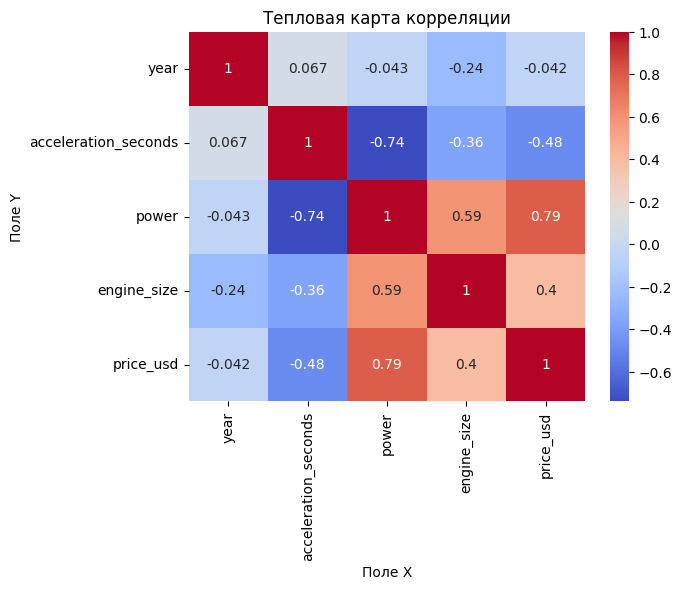

In [23]:
numeric_cols = ['year', 'acceleration_seconds', 'power', 'engine_size', 'price_usd']
corr_mat = data[numeric_cols].corr()
# Построение тепловой карты
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.xlabel('Поле X')  # Название оси X
plt.ylabel('Поле Y')  # Название оси Y
plt.title('Тепловая карта корреляции')  # Название графика
plt.show()

Гипотеза №1 Влияние размера двигателя на мощность

На основе анализа данных об объеме двигателя и мощности автомобилей было выявлено, что линия регрессии имеет положительный,что подтверждает гипотезу о том, что увеличение объема двигателя связано с увеличением мощности. Увеличение объема двигателя ведет к повышению мощности автомобиля.

In [24]:
model = LinearRegression()
X = data['engine_size'].values.reshape(-1, 1)
y = data['power']
model.fit(X, y)

# Предсказание значений
y_pred = model.predict(X)

# Построение графика с линией регрессии
fig = px.scatter(data, x='engine_size', y='power', title='Влияние размера двигателя на мощность',
                 labels={'engine_size': 'Размер двигателя (л)', 'power': 'Мощность (л.с.)'})
fig.add_traces(px.line(x=data['engine_size'], y=y_pred).data)
fig.update_traces(marker=dict(size=8, opacity=0.7),
                  selector=dict(mode='markers'))
fig.show()

Гипотеза №2 Влияние стоимости на разгон 

На основании проведенного анализа, можно сделать вывод о существовании положительной зависимости между временем разгона автомобиля до 60 миль/час и его стоимостью. Полиномиальная регрессия, проведенная на очищенных данных (исключая строки с отрицательными значениями стоимости), показала, что стоимость автомобиля имеет тенденцию к росту с увеличением времени разгона. Это означает, что автомобили с более высоким временем разгона (то есть автомобили с меньшим ускорением) имеют склонность к более низкой стоимости, в то время как автомобили с более быстрым разгоном обычно имеют более высокую стоимость.

In [25]:
fig = px.scatter(data, x='acceleration_seconds', y='price_usd', title='Зависимость стоимости от ускорения')



fig.update_xaxes(title_text='Время разгона до 60 миль/ч (сек)', showgrid=True)
fig.update_yaxes(title_text='Цена автомобиля (USD)', showgrid=True)

fig.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Полиномиальные признаки
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Обучение модели
model = LinearRegression()
model.fit(X_poly, y)

# Предсказание значений
X_pred = np.linspace(data['acceleration_seconds'].min(), data['acceleration_seconds'].max(), 100).reshape(-1, 1)
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

# Построение графика
fig = px.scatter(data, x='acceleration_seconds', y='price_usd', title='Зависимость стоимости от ускорения',
                 labels={'acceleration_seconds': 'Время разгона до 60 миль/ч (сек)', 'price_usd': 'Цена автомобиля (USD)'})

# Добавление линии полиномиальной регрессии
fig.add_trace(go.Scatter(x=X_pred.flatten(), y=y_pred, mode='lines', name='Polynomial Regression', line=dict(color='red')))

# Оформление графика
fig.update_xaxes(title_text='Время разгона до 60 миль/ч (сек)', showgrid=True)
fig.update_yaxes(title_text='Цена автомобиля (USD)', showgrid=True)

fig.show()


Гипотеза №3 Скорость автомобилей более дорогой марки может быть ниже, чем более дешевой.

На примере MacLaren и Porshe, можно убедиться, что на стоимость автомобилей оказывает влияние название бренда, и даже более дешевые марки могут обходить дорогой бренд в скорости.

In [27]:
import pandas as pd
import plotly.express as px

# Фильтрация данных для марок Porsche и McLaren
porsche_data = data[data['car'] == 'Porsche']
mclaren_data = data[data['car'] == 'McLaren']

# Вычисление средней стоимости для Porsche и McLaren
porsche_mean_price = porsche_data['price_usd'].mean()
mclaren_mean_price = mclaren_data['price_usd'].mean()

# Создание DataFrame для средних значений стоимости
price_data = pd.DataFrame({
    'Car Make': ['Porsche', 'McLaren'],
    'Mean Price (USD)': [porsche_mean_price, mclaren_mean_price]
})

# Вычисление среднего времени разгона для Porsche и McLaren
porsche_mean_acceleration = porsche_data['acceleration_seconds'].mean()
mclaren_mean_acceleration = mclaren_data['acceleration_seconds'].mean()

# Создание DataFrame для средних значений времени разгона
acceleration_data = pd.DataFrame({
    'Car Make': ['Porsche', 'McLaren'],
    'Mean Acceleration (seconds)': [porsche_mean_acceleration, mclaren_mean_acceleration]
})

# Визуализация средней стоимости с помощью графика
fig1 = px.bar(price_data, x='Car Make', y='Mean Price (USD)',
              title='Средняя стоимость автомобилей Porsche и McLaren',
              labels={'Mean Price (USD)': 'Средняя стоимость (USD)', 'Car Make': 'Марка автомобиля'})
fig1.show()

# Визуализация среднего времени разгона с помощью графика
fig2 = px.bar(acceleration_data, x='Car Make', y='Mean Acceleration (seconds)',
              title='Среднее время разгона автомобилей Porsche и McLaren',
              labels={'Mean Acceleration (seconds)': 'Среднее время разгона (сек)', 'Car Make': 'Марка автомобиля'})
fig2.show()


In [52]:
years = data['year'].unique()
year_codes = {year: code for code, year in enumerate(years, 1)}
data['year_code'] = data['year'].map(year_codes)
print(year_codes)
code_years = {code: year for year, code in year_codes.items()}
data['year_decoded'] = data['year_code'].map(code_years)

# print(data)
print(data.sample(5))

{2022: 1, 2021: 2, 2015: 3, 2019: 4, 2017: 5, 2020: 6, 2014: 7, 2023: 8}
             car      model  year  engine_size   power torque  \
241         Ford         GT  2022          3.5   660.0    550   
896         Audi       RS 7  2021          4.0   591.0    590   
853      Porsche   Panamera  2022          2.9   325.0    331   
341      Bugatti     Chiron  2021          8.0  1500.0   1180   
950  Lamborghini  Aventador  2021          6.5   770.0    531   

     acceleration_seconds  price_usd  year_code  year_decoded  
241                   2.8     500000          1          2022  
896                   3.4     114000          2          2021  
853                   5.3      88550          1          2022  
341                   2.4    3000000          2          2021  
950                   2.9     393695          2          2021  


In [55]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ['engine_size', 'power', 'torque', 'acceleration_seconds', 'price_usd']

scaled_features = scaler.fit_transform(data[features_to_scale])

data[features_to_scale] = scaled_features

print(data.head())

           car    model  year  engine_size     power    torque  \
0      Porsche      911  2022     0.217391  0.139535  0.156658   
1  Lamborghini  Huracan  2021     0.536232  0.316420  0.254134   
2      Ferrari  488 GTB  2022     0.347826  0.338266  0.356832   
3         Audi       R8  2022     0.536232  0.268499  0.221932   
4      McLaren     720S  2021     0.362319  0.372798  0.362924   

   acceleration_seconds  price_usd  year_code  year_decoded  
0              0.431818   0.014725          1          2022  
1              0.159091   0.048191          2          2021  
2              0.204545   0.059662          1          2022  
3              0.250000   0.022744          1          2022  
4              0.136364   0.052754          2          2021  
